In [2]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import approximation
from networkx.algorithms import reciprocity
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
import json
import statistics

%matplotlib inline

In [3]:
#path = "facebook_combined.txt"
#graph = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)
graph = nx.read_edgelist('C:\\Technology_new\\datasets\\facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
number_of_nodes = 1000

In [4]:
import networkx as nx
# Reference - https://snap.stanford.edu/data/ego-Facebook.html

# Perform community detection using label propagation
communities = list(nx.algorithms.community.label_propagation_communities(graph))

# Calculate the number of Nodes
print ("Reference URL - https://snap.stanford.edu/data/ego-Facebook.html")
print("Total number of Nodes:", len(graph))

# Calculate the number of edges
num_edges = graph.number_of_edges()
print("Total number of edges:", num_edges)

# Print the total number of communities
print("Total number of communities:", len(communities))

# Find the biggest and smallest communities
biggest_community = max(communities, key=len)
smallest_community = min(communities, key=len)

print("Number of nodes in the smallest community:", len(smallest_community))
print("Number of nodes in the biggest community:", len(biggest_community))
print("Smallest Community nodes details:", smallest_community)
print("Biggest Community nodes details:", biggest_community)
print("================================================================================================")
# Print the detected communities list
for i, community in enumerate(sorted(communities, key=len)):
    print(f"Community {i+1}: {community}, Number of nodes: {len(community)}")

Reference URL - https://snap.stanford.edu/data/ego-Facebook.html
Total number of Nodes: 4039
Total number of edges: 88234
Total number of communities: 44
Number of nodes in the smallest community: 2
Number of nodes in the biggest community: 1030
Smallest Community nodes details: {33, 42}
Biggest Community nodes details: {58, 107, 171, 353, 366, 389, 483, 484, 526, 580, 596, 601, 606, 629, 637, 641, 649, 651, 2838, 2885, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 3003, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1

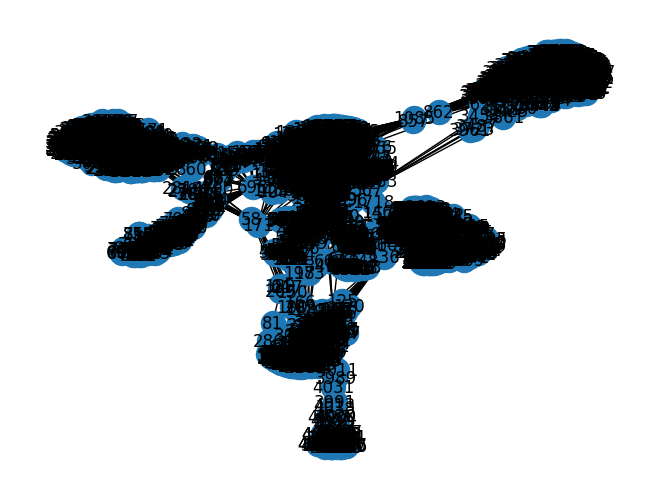

In [5]:
# Draw the graph with nodes colored by cluster
colors = [label for _, label in nx.get_node_attributes(graph, 'cluster').items()]
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=True)
plt.show()


In [6]:
def extract_local_features(graph):
    centralities = nx.degree_centrality(graph)
    clustering_dict = nx.clustering(graph)
    avg_neighbor_degree_dict = nx.average_neighbor_degree(graph)

    extracted_features = []
    nodes = random.sample(list(graph.nodes()), number_of_nodes)  # Selecting only required number of random nodes
    # nodes = list(graph.nodes())
    for node in nodes:
        degree = graph.degree(node)
        centrality = centralities[node]
        avg_neighbor_degree = avg_neighbor_degree_dict[node] if node in avg_neighbor_degree_dict else 0
        clustering_coefficient = clustering_dict[node]
        pagerank = nx.pagerank(graph)[node]
        triads = nx.triangles(graph, node)
        squares = sum(1 for u, v in graph.edges(node) for w in graph.neighbors(v) if graph.has_edge(u, w))

        node_features = [degree, centrality, avg_neighbor_degree, clustering_coefficient, pagerank, triads, squares]
        extracted_features.append(node_features)

    return extracted_features


sample_extracted_nodes = random.sample(list(graph.nodes()), number_of_nodes)
current_graph_piece = graph.subgraph(sample_extracted_nodes)
current_nodes = extract_local_features(current_graph_piece)
current_nodes = np.array(current_nodes)

current_nodes.shape

(1000, 7)

In [7]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k = 4
kmeans_model = KMeans(n_clusters=k)
k_labels = kmeans_model.fit_predict(current_nodes)
print("current_nodes...:",current_nodes)
silhouette = silhouette_score(current_nodes, k_labels)
print("Silhouette Scoring:", silhouette)

current_nodes...: [[1.00000000e+01 1.00100100e-02 2.02000000e+01 ... 1.31237187e-03
  2.40000000e+01 4.80000000e+01]
 [1.40000000e+01 1.40140140e-02 1.90714286e+01 ... 1.69940712e-03
  6.30000000e+01 1.26000000e+02]
 [1.10000000e+01 1.10110110e-02 8.90909091e+00 ... 1.55782295e-03
  1.00000000e+01 2.00000000e+01]
 ...
 [2.00000000e+00 2.00200200e-03 3.30000000e+01 ... 3.74589932e-04
  1.00000000e+00 2.00000000e+00]
 [1.50000000e+01 1.50150150e-02 4.00000000e+01 ... 9.89890940e-04
  8.10000000e+01 1.62000000e+02]
 [2.00000000e+00 2.00200200e-03 1.51500000e+02 ... 2.75039750e-04
  1.00000000e+00 2.00000000e+00]]
Silhouette Scoring: 0.751754733039865


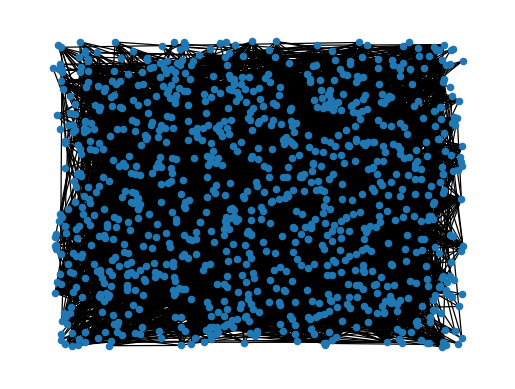

In [17]:
layout = nx.random_layout(current_graph_piece)
plt.axis('off')

nx.draw(current_graph_piece, pos=layout, node_size=20, width=0.9)
plt.show()

In [18]:
outputdf = pd.DataFrame(current_nodes)
outputdf[7] = k_labels
outputdf.head()

,0,1,2,3,4,5,6,7
0,6.0,0.006006,29.333333,0.600000,0.000361,9.0,18.0,0
1,4.0,0.004004,77.500000,1.000000,0.000484,6.0,12.0,0
2,21.0,0.021021,13.809524,0.371429,0.001809,78.0,156.0,0
3,40.0,0.040040,38.725000,0.756410,0.001274,590.0,1180.0,2
4,2.0,0.002002,5.000000,1.000000,0.000524,1.0,2.0,0


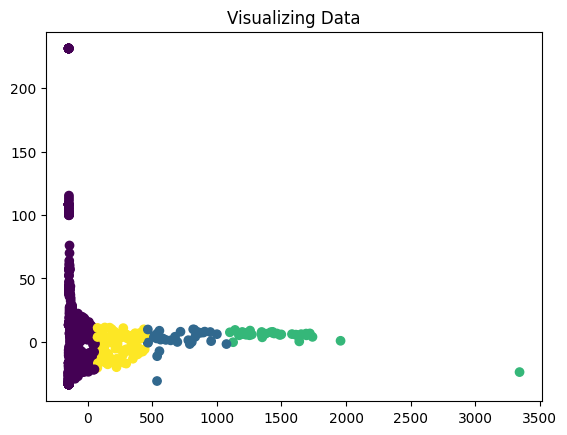

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(outputdf)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=k_labels, cmap='viridis')
plt.title('Visualizing Data')
plt.show()